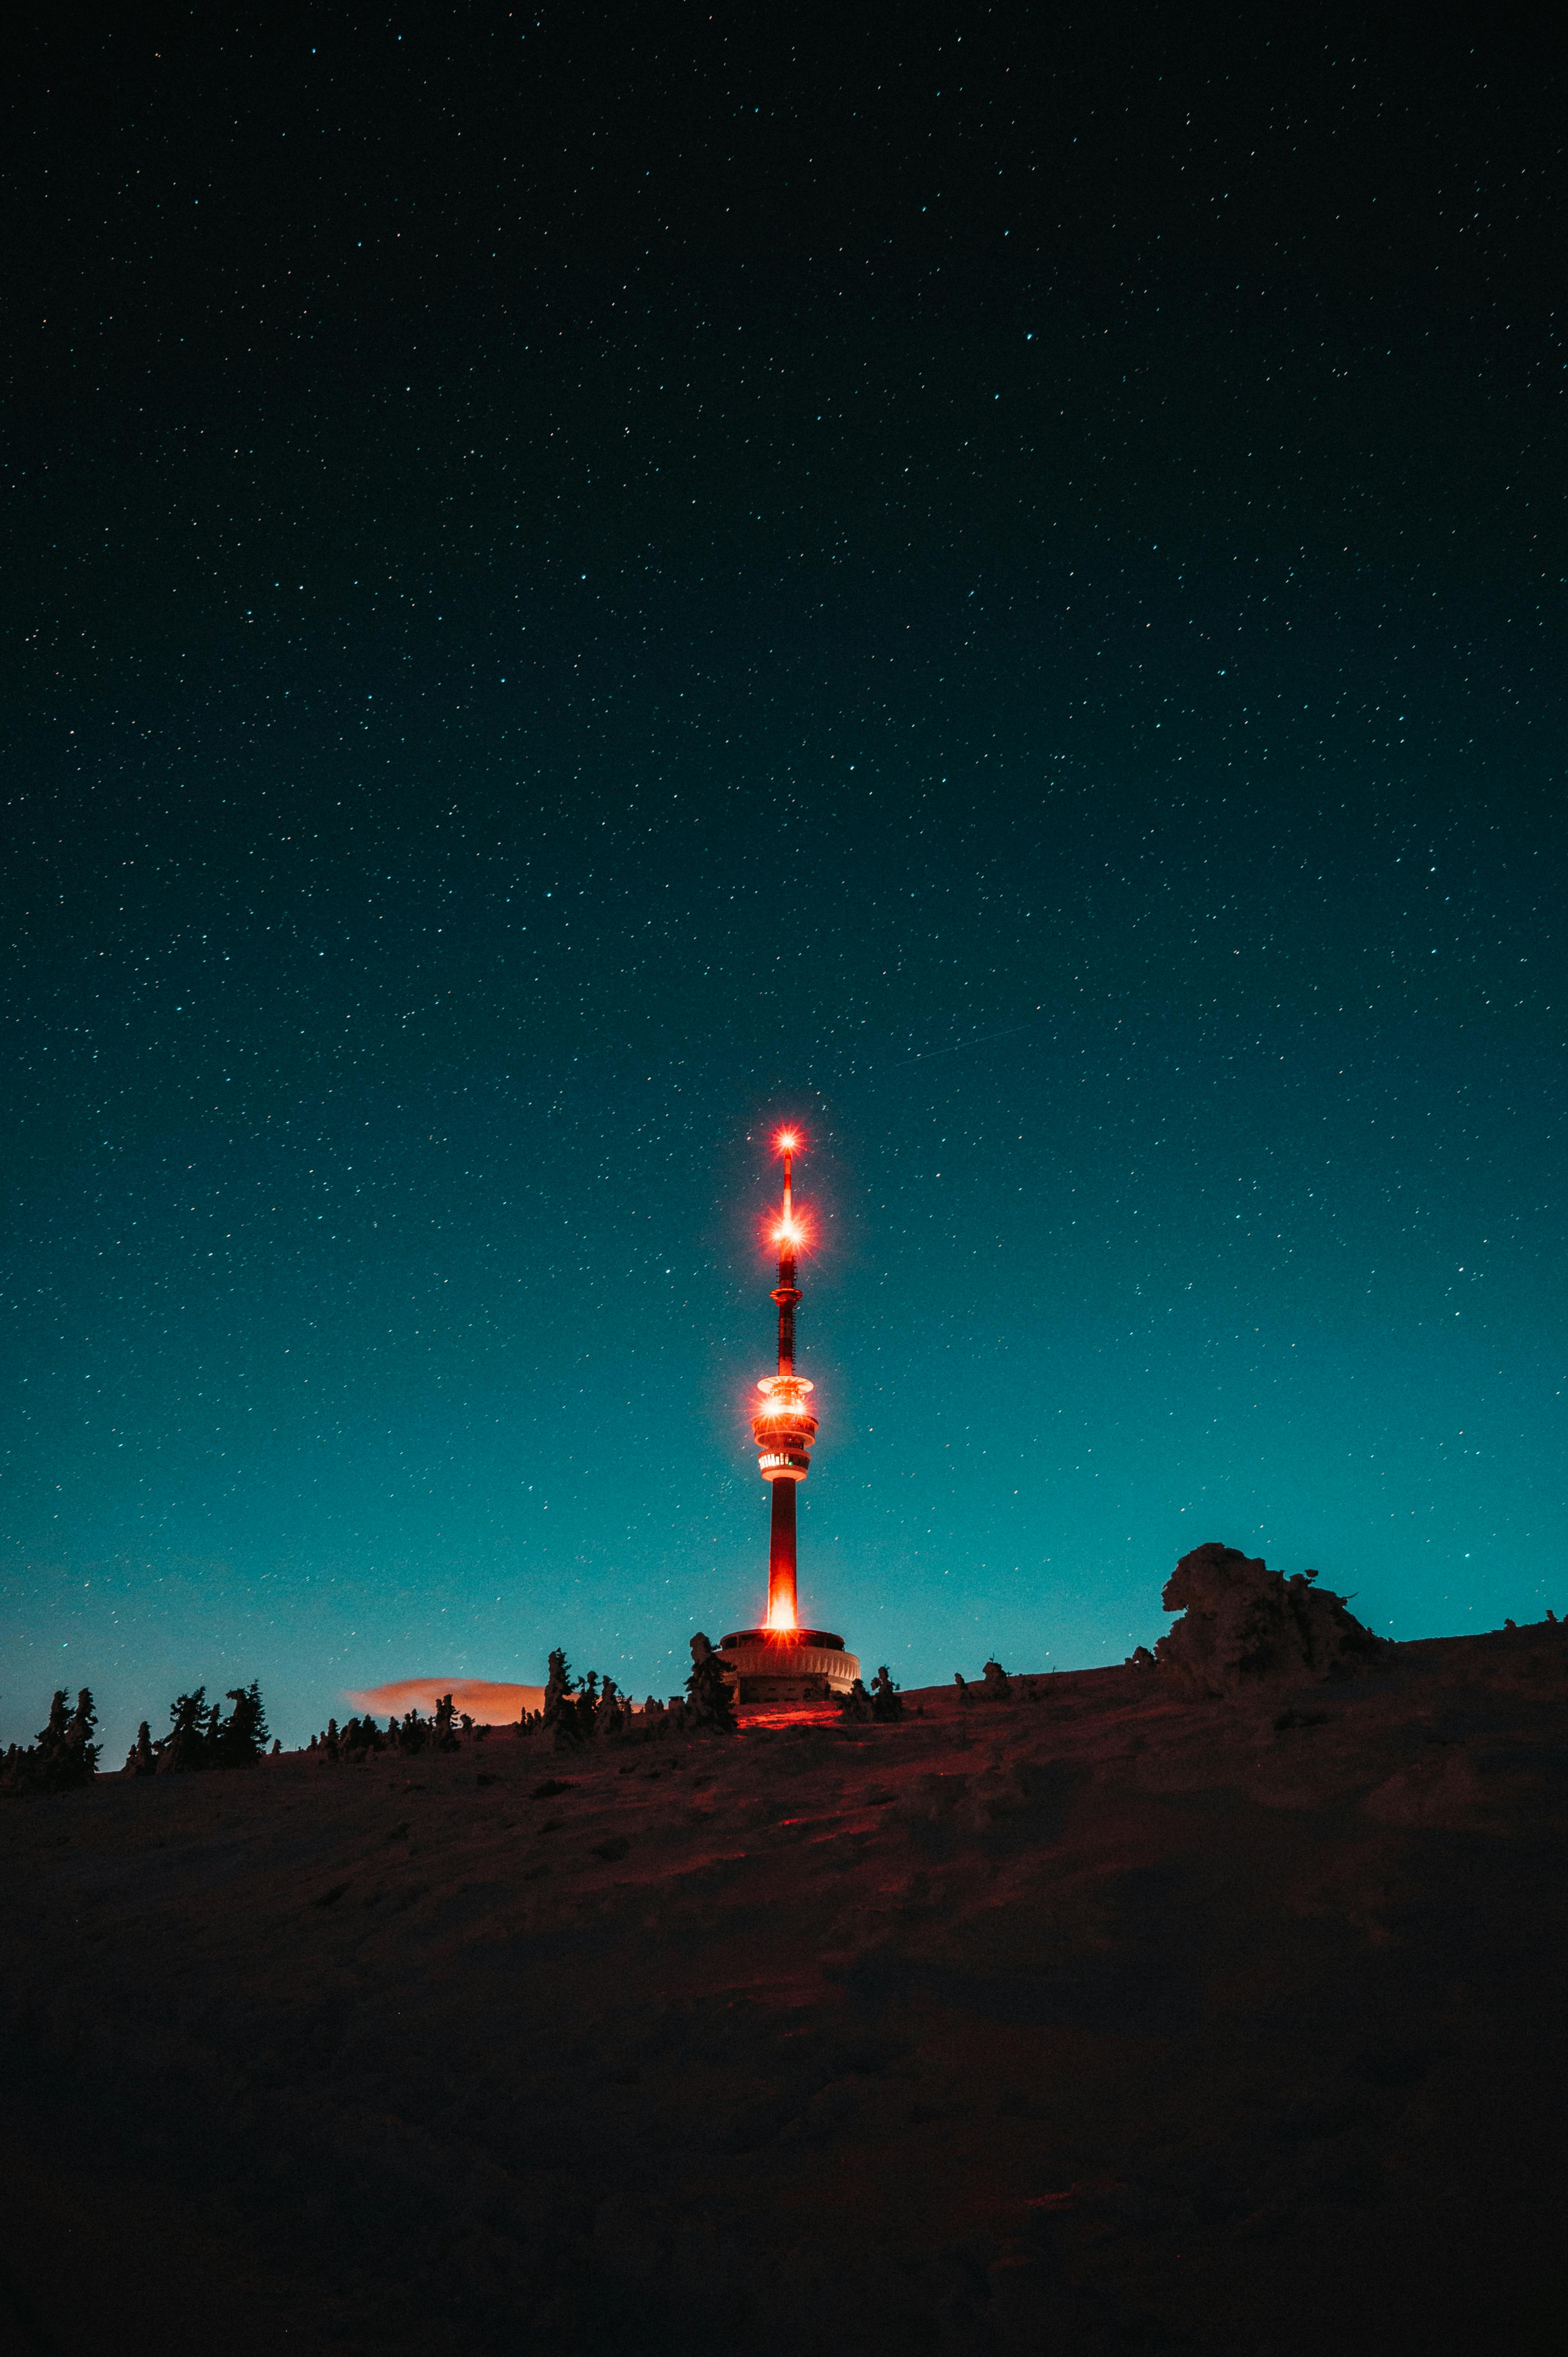

# Description of each column

**customer_id** – A unique identifier for each customer in the telecom company.

**telecom_partner** – The telecom service provider that the customer is subscribed to.

**gender** – The gender of the customer (e.g., Male, Female, Non-binary, etc.).

**age** – The age of the customer in years.

**state** – The state where the customer resides.

**city** – The city where the customer resides.

**pincode** – The postal code (ZIP code) corresponding to the customer’s location.

**date_of_registration** – The date when the customer first registered with the telecom provider.

**num_dependents** – The number of dependents associated with the customer (e.g., family members relying on the same telecom account).

**estimated_salary** – The estimated salary or income of the customer.

**calls_made** – The total number of calls made by the customer within a given period.

**sms_sent** – The total number of SMS messages sent by the customer.

**data_used** – The amount of mobile data (in GB or MB) consumed by the customer.

**churn** – A binary indicator (Yes/No or 1/0) showing whether the customer has churned (left the telecom service) or not.

In [108]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [109]:
#load data
data = pd.read_csv('/content/telecom_churn.csv')

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [111]:
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [112]:
#the number negative values in (calls_made	sms_sent	data_used	)
negative_counts = data[['calls_made', 'sms_sent', 'data_used']].lt(0).sum()


In [113]:
negative_counts

,0
calls_made,6713
sms_sent,7375
data_used,6050


In [114]:
#the negative values in calls_made
data[data['calls_made']< 0 ]

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
68,69,Airtel,M,39,Kerala,Mumbai,413226,2020-01-01,2,121809,-1,13,8728,0
109,110,BSNL,M,36,Chhattisgarh,Delhi,635762,2020-01-01,3,53001,-3,24,3695,0
154,155,Reliance Jio,M,70,Arunachal Pradesh,Kolkata,973590,2020-01-01,0,53865,-5,42,9856,0
180,181,Reliance Jio,F,55,Maharashtra,Mumbai,387154,2020-01-01,0,121888,-10,9,8344,0
190,191,Reliance Jio,M,66,Kerala,Chennai,214048,2020-01-01,0,99159,-3,-1,3838,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243125,243126,Airtel,F,43,Karnataka,Mumbai,841704,2023-05-01,2,65278,-2,32,5129,0
243169,243170,BSNL,M,37,Chhattisgarh,Delhi,210169,2023-05-02,0,128961,-2,8,7437,0
243210,243211,Reliance Jio,M,31,Punjab,Hyderabad,994098,2023-05-02,2,84768,-4,8,3398,1
243278,243279,Vodafone,M,49,Mizoram,Mumbai,488462,2023-05-02,1,31299,-7,12,31,1


In [115]:
#the negative values in sms_sent
data[data['sms_sent']< 0 ]

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
19,20,Vodafone,M,26,Uttar Pradesh,Hyderabad,516585,2020-01-01,1,109753,95,-1,9993,0
33,34,BSNL,F,31,Haryana,Bangalore,830078,2020-01-01,2,106097,89,-2,3927,0
83,84,Reliance Jio,F,22,Assam,Hyderabad,848983,2020-01-01,2,47235,102,-1,7785,0
90,91,BSNL,M,28,Bihar,Bangalore,638325,2020-01-01,0,31297,36,-3,2695,0
110,111,Airtel,F,44,Maharashtra,Bangalore,208672,2020-01-01,4,107123,38,-4,3529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243339,243340,Vodafone,F,21,Chhattisgarh,Kolkata,526118,2023-05-02,4,108410,22,-3,2439,0
243388,243389,Airtel,F,47,Manipur,Delhi,274781,2023-05-03,3,110855,48,-3,5243,0
243443,243444,Reliance Jio,M,65,Manipur,Kolkata,581455,2023-05-03,3,125216,23,-1,7108,0
243484,243485,Reliance Jio,M,21,Maharashtra,Kolkata,938443,2023-05-03,2,92431,59,-1,8959,0


In [116]:
#the negative values in data_used
data[data['data_used']< 0 ]

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
38,39,Reliance Jio,M,69,Gujarat,Chennai,712223,2020-01-01,1,87166,92,15,-790,0
69,70,Reliance Jio,M,28,Kerala,Chennai,520338,2020-01-01,2,34463,36,6,-492,0
72,73,BSNL,F,43,Uttarakhand,Delhi,554046,2020-01-01,4,101224,33,44,-73,0
87,88,Airtel,F,33,Himachal Pradesh,Kolkata,100889,2020-01-01,0,122987,78,4,-149,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243377,243378,Airtel,M,48,Arunachal Pradesh,Chennai,273303,2023-05-03,3,34942,47,39,-88,1
243434,243435,BSNL,M,31,Uttarakhand,Mumbai,585517,2023-05-03,2,143739,90,16,-403,0
243455,243456,BSNL,F,22,Chhattisgarh,Kolkata,371679,2023-05-03,4,107591,44,33,-459,0
243481,243482,Vodafone,F,61,Meghalaya,Chennai,964995,2023-05-03,3,59843,14,26,-529,0


In [117]:
#create new colums contain to the (0,1) 1 --> the value is negative  and 0 --> the value is posative
data['calls_made_negative'] = (data['calls_made'] < 0).astype(int)
data['sms_sent_negative'] = (data['sms_sent'] < 0).astype(int)
data['data_used_negative'] = (data['data_used'] < 0).astype(int)



In [118]:
data

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,calls_made_negative,sms_sent_negative,data_used_negative
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0,0,0,1
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0,0,0,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1,0,0,0
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1,0,0,0
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0,0,0,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0,0,0,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0,0,0,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0,0,0,0


In [119]:
#convert the negative values to absolute values
data[['calls_made', 'sms_sent', 'data_used']] = data[['calls_made', 'sms_sent', 'data_used']].abs()



In [120]:
##Count negative values in data_used , calls_made , sms_sent
neg_count_calls_update = (data['data_used'] < 0).sum()
neg_count_sms_update = (data['calls_made'] < 0).sum()
neg_count_data_update = (data['sms_sent'] < 0).sum()

In [121]:
neg_count_calls_update


np.int64(0)

In [122]:
neg_count_sms_update

np.int64(0)

In [123]:
neg_count_data_update

np.int64(0)